## **Exercise 1**

In [ ]:
# load functions and data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

df = sns.load_dataset("penguins")
df.fillna(df.mean(),inplace=True)

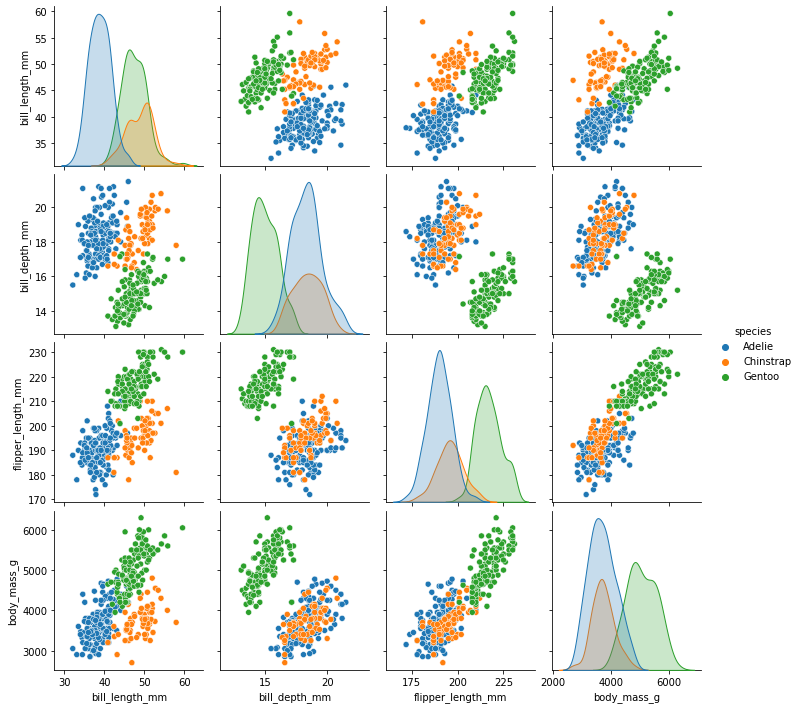

In [ ]:
# 1.a create a pairplot with hue on species and check which features can be used to distinguish the species
sns.pairplot(df, hue='species')

In [ ]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


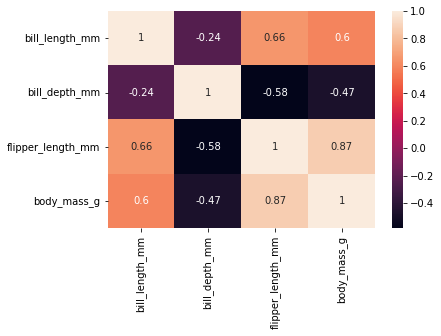

In [ ]:
# 2.d padd the correlation table to seaborns heatmap function
sns.heatmap(df.corr(), annot=True)

## **Exercise 2**

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# load data and store in variable df
df = pd.read_csv('https://drive.google.com/uc?id=1Rzq2VqPVRM2kfMuh_jToJKzKUvBOC0vp')

df.head()

,id,price,neighbourhood_group_cleansed,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,bed_type,minimum_nights,maximum_nights,availability_365,property_type,is_business_travel_ready,cleaning_fee,room_type,square_feet,guests_included
0,28684898,$50.00,Neukölln,52.473978,13.454423,1.0,18,2.0,2.0,9.0,Real Bed,1,13,73,Apartment,f,$0.00,Private room,NaN,1
1,22607348,$10.00,Treptow - Köpenick,52.468095,13.487103,1.0,0,1.0,1.0,9.0,Real Bed,30,1124,156,Apartment,f,NaN,Private room,NaN,1
2,21019199,$35.00,Neukölln,52.481810,13.437268,1.0,0,1.0,1.0,9.0,Real Bed,1,1125,0,Apartment,f,$15.00,Private room,NaN,1
3,21919556,$99.00,Pankow,52.537269,13.416036,2.0,0,2.0,2.0,NaN,Real Bed,14,41,35,Apartment,f,$50.00,Entire home/apt,NaN,1
4,4820648,$39.00,Friedrichshain-Kreuzberg,52.491483,13.387362,1.0,0,1.0,1.0,9.0,Real Bed,60,1125,289,Apartment,f,NaN,Entire home/apt,NaN,1


In [ ]:
df

,id,price,neighbourhood_group_cleansed,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,bed_type,minimum_nights,maximum_nights,availability_365,property_type,is_business_travel_ready,cleaning_fee,room_type,square_feet,guests_included
0,28684898,$50.00,Neukölln,52.473978,13.454423,1.0,18,2.0,2.0,9.0,Real Bed,1,13,73,Apartment,f,$0.00,Private room,NaN,1
1,22607348,$10.00,Treptow - Köpenick,52.468095,13.487103,1.0,0,1.0,1.0,9.0,Real Bed,30,1124,156,Apartment,f,NaN,Private room,NaN,1
2,21019199,$35.00,Neukölln,52.481810,13.437268,1.0,0,1.0,1.0,9.0,Real Bed,1,1125,0,Apartment,f,$15.00,Private room,NaN,1
3,21919556,$99.00,Pankow,52.537269,13.416036,2.0,0,2.0,2.0,NaN,Real Bed,14,41,35,Apartment,f,$50.00,Entire home/apt,NaN,1
4,4820648,$39.00,Friedrichshain-Kreuzberg,52.491483,13.387362,1.0,0,1.0,1.0,9.0,Real Bed,60,1125,289,Apartment,f,NaN,Entire home/apt,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13526,17783594,$38.00,Treptow - Köpenick,52.469634,13.588212,1.0,18,2.0,2.0,9.0,Real Bed,1,14,65,Apartment,f,$50.00,Entire home/apt,NaN,1
13527,28732723,$45.00,Pankow,52.548687,13.448582,1.0,0,1.0,1.0,NaN,Real Bed,6,14,0,Apartment,f,$0.00,Entire home/apt,NaN,1
13528,7823323,$22.00,Mitte,52.524995,13.336786,2.0,0,1.0,1.0,9.0,Real Bed,4,12,0,Apartment,f,NaN,Private room,NaN,1
13529,901569,$40.00,Pankow,52.530876,13.433975,1.0,5,1.0,1.0,10.0,Real Bed,2,45,334,Apartment,f,NaN,Private room,0.0,1


In [ ]:
# 2.a the price is currently stored as a string, for example: $1,000.00
# we need to remove the dollar sign and the comma, afterwars we can transform the column to type float
df['price'] = df['price'].str.replace('$','') # replace dollar sign
df['price'] = df['price'].str.replace(',','') # replace comma
df['price'] = df['price'].astype(float) # transform to float

In [ ]:
# 2.b the same can be done with the column cleaning_fee
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$','')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',','')
df['cleaning_fee'] = df['cleaning_fee'].astype(float)

In [ ]:
# 2.c some columns have a lot of missing values.
# try to understand how the following comand works.
# try to execute df.isna() only, then df.isna().sum() ...

df.isna().sum().sort_values(ascending=False)

square_feet                     13260
cleaning_fee                     4272
review_scores_value              2678
beds                               29
bathrooms                          23
bedrooms                           11
price                               0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
availability_30                     0
guests_included                     0
bed_type                            0
minimum_nights                      0
maximum_nights                      0
availability_365                    0
property_type                       0
is_business_travel_ready            0
room_type                           0
id                                  0
dtype: int64

In [ ]:
# 2.d fill ne missing values with the mean value, check if the above command that
# no missing values are left
df = df.fillna(df.mean())
df.isna().sum().sort_values(ascending=False)

guests_included                 0
square_feet                     0
price                           0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
bathrooms                       0
availability_30                 0
beds                            0
bedrooms                        0
review_scores_value             0
bed_type                        0
minimum_nights                  0
maximum_nights                  0
availability_365                0
property_type                   0
is_business_travel_ready        0
cleaning_fee                    0
room_type                       0
id                              0
dtype: int64

In [ ]:
# 2.d compute the corelations and look which features have a high corelation with price
df.corr().style.background_gradient()

,id,price,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,minimum_nights,maximum_nights,availability_365,cleaning_fee,square_feet,guests_included
id,1.000000,0.036903,0.000890,-0.021492,-0.009186,0.124149,-0.054282,-0.078605,0.038666,-0.039821,-0.007156,-0.063357,-0.097765,-0.042794,-0.073048
price,0.036903,1.000000,-0.000523,-0.043415,0.056410,0.113626,0.093780,0.105298,-0.049802,0.006582,-0.000835,0.103613,0.490034,0.446011,0.093485
latitude,0.000890,-0.000523,1.000000,-0.103196,0.002293,-0.007762,0.015880,0.010364,-0.008968,0.012127,0.008208,0.004840,0.034526,-0.063214,0.030783
longitude,-0.021492,-0.043415,-0.103196,1.000000,0.000849,-0.052582,-0.005220,0.008262,0.020137,-0.024320,-0.004821,-0.082404,-0.055417,0.001394,-0.001144
bathrooms,-0.009186,0.056410,0.002293,0.000849,1.000000,0.037050,0.267847,0.300214,-0.003899,-0.004560,-0.003453,0.039929,0.133509,0.272047,0.159628
availability_30,0.124149,0.113626,-0.007762,-0.052582,0.037050,1.000000,0.129269,0.040963,-0.060861,0.032532,0.012623,0.541278,0.087697,0.007457,0.082160
beds,-0.054282,0.093780,0.015880,-0.005220,0.267847,0.129269,1.000000,0.615396,-0.096324,0.010716,-0.006461,0.192418,0.243689,0.384708,0.445663
bedrooms,-0.078605,0.105298,0.010364,0.008262,0.300214,0.040963,0.615396,1.000000,-0.024368,0.000833,-0.002958,0.075547,0.244082,0.473834,0.372192
review_scores_value,0.038666,-0.049802,-0.008968,0.020137,-0.003899,-0.060861,-0.096324,-0.024368,1.000000,-0.014076,-0.006511,-0.100541,-0.116128,-0.068200,-0.067031
minimum_nights,-0.039821,0.006582,0.012127,-0.024320,-0.004560,0.032532,0.010716,0.000833,-0.014076,1.000000,-0.001543,0.088981,0.085880,-0.047118,0.012834


In [ ]:
# load functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# 2.e define a feature dataframe with 3 features and the target column price
# create a train and test dataset
X = df[['square_feet','cleaning_fee', 'latitude','longitude','bedrooms','review_scores_value','minimum_nights']]
y_target = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.3)

In [ ]:
# 2.f train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

model.predict(X_train)


array([62.59410796, 82.84297983, 51.11295853, ..., 46.77387102,
       62.39692711, 55.51508818])

In [ ]:
# 2.g test your model
y_predict = model.predict(X_test)
rmse = mean_squared_error(y_test, y_predict, squared=False)

In [ ]:
# 2.h include more features to your model and look how the root mean square error gets lower